In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import animation, rc
from IPython.display import HTML, Image
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import timedelta

%matplotlib inline

In [2]:
#Prepare Matplotlib Values
#set font size names
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 22
#set font sizes
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
#set figure size
plt.rcParams["figure.figsize"] = (14, 8) # size of the figure plotted
#set color palettes
qualitative_palette = sns.color_palette("husl")
sequential_palette = sns.light_palette("#FDB515", 4)
diverging_palette = sns.diverging_palette(h_neg=233, h_pos=52, s=95, l=75, center='light')
sns.set_palette(qualitative_palette)#, color_codes=True)

In [3]:
# data source: https://www.heritage.org/index/about
freedom_index = pd.read_csv("IndexOfEconomicFreedom_2020.csv", index_col=0)
freedom_index

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2020 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1,Afghanistan,Afghanistan,Asia-Pacific,136.0,33.0,54.7,48.300000,30.000000,24.8,...,Afghanistan,36.020,72.648,2.300,2.2,2016.89,1.5,0.626,139.200000,7.079
1,2,Albania,Albania,Europe,57.0,30.0,66.9,57.100000,33.000000,38.8,...,Albania,2.874,38.356,4.162,3.1,13344.54,13.9,2.029,1293.617724,68.590
2,3,Algeria,Algeria,Middle East and North Africa,169.0,14.0,46.9,37.900000,35.000000,28.3,...,Algeria,42.582,657.462,2.059,2.8,15439.92,12.2,4.270,1506.316886,36.872
3,4,Angola,Angola,Sub-Saharan Africa,154.0,35.0,52.2,36.900000,14.300000,15.1,...,Angola,29.250,199.319,-1.699,0.3,6814.33,7.3,19.629,-5732.491000,88.087
4,5,Argentina,Argentina,Americas,149.0,26.0,53.1,50.500000,47.000000,49.7,...,Argentina,44.560,915.125,-2.515,-0.3,20537.06,9.5,34.277,12161.837000,86.289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,179,Venezuela,Venezuela,Americas,179.0,32.0,25.2,10.100000,12.600000,14.6,...,Venezuela,29.187,277.800,-18.000,-12.2,8800.00,8.4,929789.500,956.000000,175.618
182,180,Vietnam,Vietnam,Asia-Pacific,105.0,21.0,58.8,52.600000,40.100000,33.8,...,Vietnam,94.575,710.307,7.076,6.6,7510.53,1.9,3.540,15500.000000,57.542
183,181,Yemen,Yemen,Middle East and North Africa,NaN,NaN,NaN,22.514037,20.105317,21.9,...,Yemen,30.816,73.258,-2.701,-7.8,2377.24,12.9,41.773,-282.098333,63.164
184,182,Zambia,Zambia,Sub-Saharan Africa,147.0,31.0,53.5,45.200000,31.300000,28.4,...,Zambia,17.773,72.932,3.477,3.6,4103.50,7.2,7.043,568.950000,72.361


In [4]:
# list(freedom_index.columns)

In [5]:
# corr_matrix = freedom_index.corr()
# high_corr = corr_matrix.apply(lambda arr: arr.apply(lambda val: abs(val) < 0.3 and val))
# clear_high_corr = high_corr[[col for col in high_corr.columns if np.count_nonzero(high_corr[col]) > 1]]
# clear_high_corr = clear_high_corr.loc[[i for i in list(clear_high_corr.index) if np.count_nonzero(clear_high_corr.loc[i, :]) > 0], :]
# clear_high_corr

In [6]:
# corr_matrix.loc[:, ['2020 Score']]

In [7]:
heritage_data = freedom_index[["2020 Score", 'Country', 'Population (Millions)', 'GDP (Billions, PPP)']]
heritage_data = heritage_data.rename(columns={"2020 Score":"WFI Score"})
heritage_data['log GDP'] = np.log(heritage_data['GDP (Billions, PPP)'])
heritage_data = heritage_data.drop("GDP (Billions, PPP)", axis=1)
heritage_data['log Population'] = np.log(heritage_data['Population (Millions)'])
heritage_data = heritage_data.drop("Population (Millions)", axis=1)
heritage_data

,WFI Score,Country,log GDP,log Population
0,54.7,Afghanistan,4.285626,3.584074
1,66.9,Albania,3.646911,1.055705
2,46.9,Algeria,6.488387,3.751432
3,52.2,Angola,5.294907,3.375880
4,53.1,Argentina,6.819061,3.796837
...,...,...,...,...
181,25.2,Venezuela,5.626901,3.373723
182,58.8,Vietnam,6.565697,4.549393
183,NaN,Yemen,4.293987,3.428034
184,53.5,Zambia,4.289528,2.877680


In [8]:
# make the koreas consistent in name
heritage_data.loc[heritage_data['Country'].apply(lambda name: 'Korea' in name), 'Country'] = ["North Korea", "South Korea"]
heritage_data[heritage_data['Country'].apply(lambda name: 'Korea' in name)]

,WFI Score,Country,log GDP,log Population
88,4.2,North Korea,3.688879,3.242592
89,74.0,South Korea,7.666838,3.944742


In [9]:
# data source: https://ourworldindata.org/coronavirus-source-data
corona_dataset_path = [path for path in os.listdir() if "full_data" in path][-1]
full_data = pd.read_csv(corona_dataset_path)
full_data

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2019-12-31,Afghanistan,0,0,0,0
1,2020-01-01,Afghanistan,0,0,0,0
2,2020-01-02,Afghanistan,0,0,0,0
3,2020-01-03,Afghanistan,0,0,0,0
4,2020-01-04,Afghanistan,0,0,0,0
...,...,...,...,...,...,...
5915,2020-03-18,World,14750,770,194909,7873
5916,2020-03-19,World,18345,970,213254,8843
5917,2020-03-20,World,29222,1042,242476,9885
5918,2020-03-19,Zambia,2,0,2,0


In [10]:
# can't have a death wo a case, so the data must have a missing value, or fewer deaths than cases
# this checks for the above scenario
missing_deaths_not_cases = full_data['total_cases'].isna() & ~full_data['total_deaths'].isna()
less_cases_than_deaths = full_data['total_cases'] < full_data['total_deaths']
erroring_indices = full_data[missing_deaths_not_cases | less_cases_than_deaths].index
full_data.loc[erroring_indices, ]

,date,location,new_cases,new_deaths,total_cases,total_deaths


In [11]:
# this fixes the hole from above
# set the number of cases to the number of deaths wherever deaths is less than cases or cases is missing but deaths is not
full_data.loc[missing_deaths_not_cases | less_cases_than_deaths, 'total_cases'] = \
    full_data.loc[missing_deaths_not_cases | less_cases_than_deaths, 'total_deaths']

full_data.loc[missing_deaths_not_cases | less_cases_than_deaths]

,date,location,new_cases,new_deaths,total_cases,total_deaths


In [12]:
# check the fix is properly implemented 
full_data.loc[erroring_indices, ]

,date,location,new_cases,new_deaths,total_cases,total_deaths


In [13]:
# Some countries lacks data from the Heritage foundation, so we're just gonna remove them entirely oops
countries = heritage_data[heritage_data['WFI Score'].isna()]['Country']
countries

78              Iraq
98             Libya
99     Liechtenstein
153          Somalia
161            Syria
183            Yemen
Name: Country, dtype: object

In [14]:
filtered_data = full_data[~full_data['location'].isin(countries)]
np.unique(filtered_data['location']).shape

(165,)

In [15]:
filled_data = filtered_data.fillna(0)
date = pd.to_datetime(filled_data['date'])
date.dt.to_period('M')
filled_data['date']= pd.to_datetime(filled_data['date'])
filled_data['easy_date'] = filled_data['date'].apply(lambda x:x.strftime('%m-%d'))
for col in filled_data.columns[2:6]:
    filled_data[col] = np.log(filled_data[col] + 1)

filled_data.head(20)

C:\Users\aurum\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,date,location,new_cases,new_deaths,total_cases,total_deaths,easy_date
0,2019-12-31,Afghanistan,0.0,0.0,0.0,0.0,12-31
1,2020-01-01,Afghanistan,0.0,0.0,0.0,0.0,01-01
2,2020-01-02,Afghanistan,0.0,0.0,0.0,0.0,01-02
3,2020-01-03,Afghanistan,0.0,0.0,0.0,0.0,01-03
4,2020-01-04,Afghanistan,0.0,0.0,0.0,0.0,01-04
5,2020-01-05,Afghanistan,0.0,0.0,0.0,0.0,01-05
6,2020-01-06,Afghanistan,0.0,0.0,0.0,0.0,01-06
7,2020-01-07,Afghanistan,0.0,0.0,0.0,0.0,01-07
8,2020-01-08,Afghanistan,0.0,0.0,0.0,0.0,01-08
9,2020-01-09,Afghanistan,0.0,0.0,0.0,0.0,01-09


In [16]:
afghan_data = filled_data[filled_data['location'] == "Afghanistan"]
#this is missing a notable amount of data
afghan_data.tail(20)

,date,location,new_cases,new_deaths,total_cases,total_deaths,easy_date
51,2020-02-20,Afghanistan,0.000000,0.0,0.000000,0.0,02-20
52,2020-02-21,Afghanistan,0.000000,0.0,0.000000,0.0,02-21
53,2020-02-22,Afghanistan,0.000000,0.0,0.000000,0.0,02-22
54,2020-02-23,Afghanistan,0.000000,0.0,0.000000,0.0,02-23
55,2020-02-24,Afghanistan,0.000000,0.0,0.000000,0.0,02-24
56,2020-02-25,Afghanistan,0.693147,0.0,0.693147,0.0,02-25
57,2020-02-26,Afghanistan,0.000000,0.0,0.693147,0.0,02-26
58,2020-02-27,Afghanistan,0.000000,0.0,0.693147,0.0,02-27
59,2020-02-28,Afghanistan,0.000000,0.0,0.693147,0.0,02-28
60,2020-02-29,Afghanistan,0.000000,0.0,0.693147,0.0,02-29


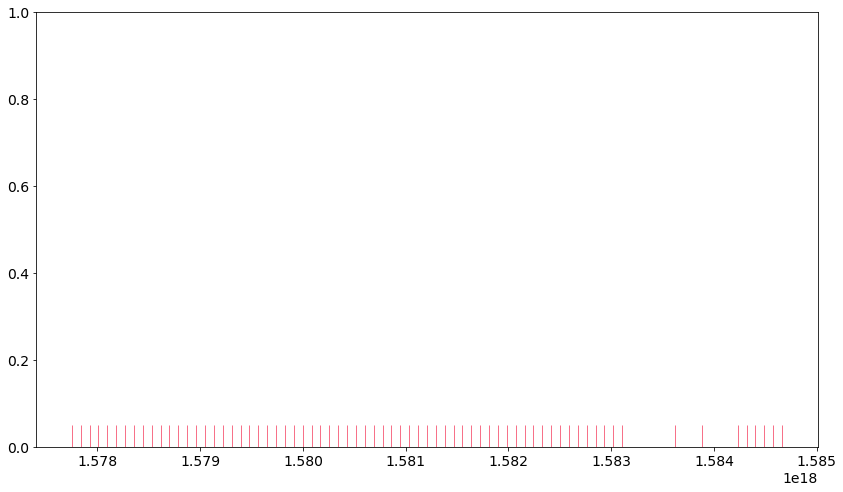

In [17]:
sns.rugplot(pd.to_numeric(afghan_data['date']))

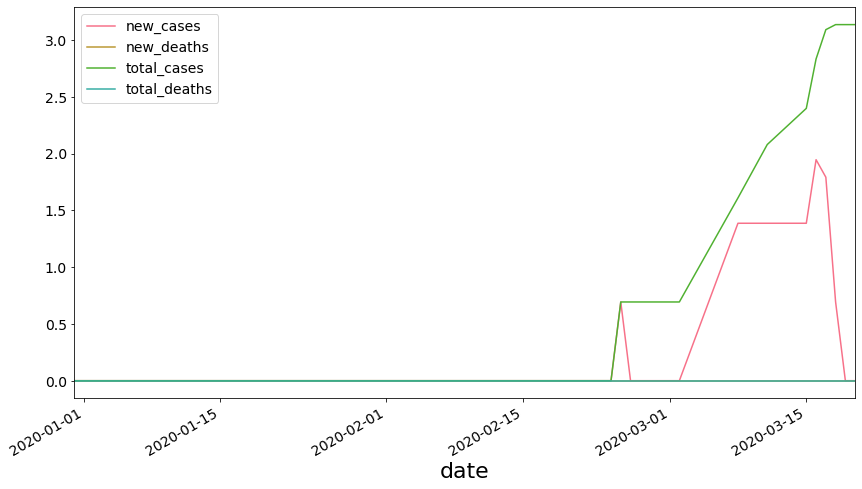

In [18]:
afghan_data.plot(x='date')

In [19]:
afghan_data_logs = afghan_data.copy()
numerical_columns = afghan_data.columns[2:6]
for col in numerical_columns:
    afghan_data_logs["log_" + col] = np.log(afghan_data.loc[:, col])

afghan_data_logs

C:\Users\aurum\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,date,location,new_cases,new_deaths,total_cases,total_deaths,easy_date,log_new_cases,log_new_deaths,log_total_cases,log_total_deaths
0,2019-12-31,Afghanistan,0.000000,0.0,0.000000,0.0,12-31,-inf,-inf,-inf,-inf
1,2020-01-01,Afghanistan,0.000000,0.0,0.000000,0.0,01-01,-inf,-inf,-inf,-inf
2,2020-01-02,Afghanistan,0.000000,0.0,0.000000,0.0,01-02,-inf,-inf,-inf,-inf
3,2020-01-03,Afghanistan,0.000000,0.0,0.000000,0.0,01-03,-inf,-inf,-inf,-inf
4,2020-01-04,Afghanistan,0.000000,0.0,0.000000,0.0,01-04,-inf,-inf,-inf,-inf
...,...,...,...,...,...,...,...,...,...,...,...
66,2020-03-16,Afghanistan,1.945910,0.0,2.833213,0.0,03-16,0.665730,-inf,1.041412,-inf
67,2020-03-17,Afghanistan,1.791759,0.0,3.091042,0.0,03-17,0.583198,-inf,1.128508,-inf
68,2020-03-18,Afghanistan,0.693147,0.0,3.135494,0.0,03-18,-0.366513,-inf,1.142787,-inf
69,2020-03-19,Afghanistan,0.000000,0.0,3.135494,0.0,03-19,-inf,-inf,1.142787,-inf


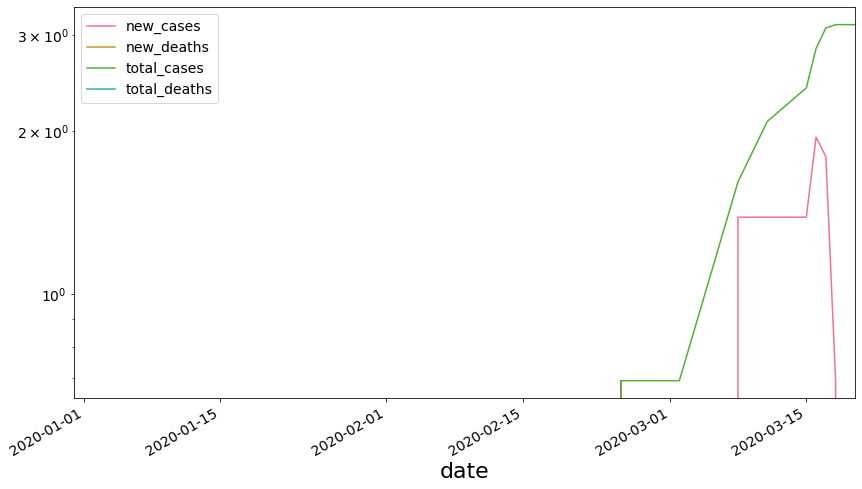

In [20]:
afghan_data.plot(x='date')
plt.yscale('log')

In [21]:
last = lambda arr: list(arr)[-1]
most_recent_data_by_country = filled_data.groupby('location').agg(last)
sorted_most_recent_data_by_country = most_recent_data_by_country.sort_values('total_cases', ascending=False).iloc[1:, ]
sorted_most_recent_data_by_country

,date,new_cases,new_deaths,total_cases,total_deaths,easy_date
location,,,,,,
China,2020-03-20,4.605170,1.609438,11.306369,8.087948,03-20
Italy,2020-03-20,8.579792,6.063785,10.622205,8.133881,03-20
Iran,2020-03-20,6.953684,5.010635,9.820541,7.158514,03-20
Spain,2020-03-20,8.140898,5.135798,9.749637,6.643790,03-20
United States,2020-03-20,8.483843,0.000000,9.564582,5.017280,03-20
...,...,...,...,...,...,...
Guernsey,2020-03-20,0.693147,0.000000,0.693147,0.000000,03-20
Guinea,2020-03-20,0.000000,0.000000,0.693147,0.000000,03-20
Saint Vincent and the Grenadines,2020-03-13,0.693147,0.000000,0.693147,0.000000,03-13


In [22]:
spain_data = filled_data[filled_data['location'] == 'Spain']
spain_data

,date,location,new_cases,new_deaths,total_cases,total_deaths,easy_date
4973,2019-12-31,Spain,0.000000,0.000000,0.000000,0.000000,12-31
4974,2020-01-01,Spain,0.000000,0.000000,0.000000,0.000000,01-01
4975,2020-01-02,Spain,0.000000,0.000000,0.000000,0.000000,01-02
4976,2020-01-03,Spain,0.000000,0.000000,0.000000,0.000000,01-03
4977,2020-01-04,Spain,0.000000,0.000000,0.000000,0.000000,01-04
...,...,...,...,...,...,...,...
5049,2020-03-16,Spain,7.601402,5.030438,8.955964,5.666427,03-16
5050,2020-03-17,Spain,7.271704,3.091042,9.126089,5.736572,03-17
5051,2020-03-18,Spain,7.594884,5.209486,9.321792,6.198479,03-18
5052,2020-03-19,Spain,7.839526,4.682131,9.526391,6.395262,03-19


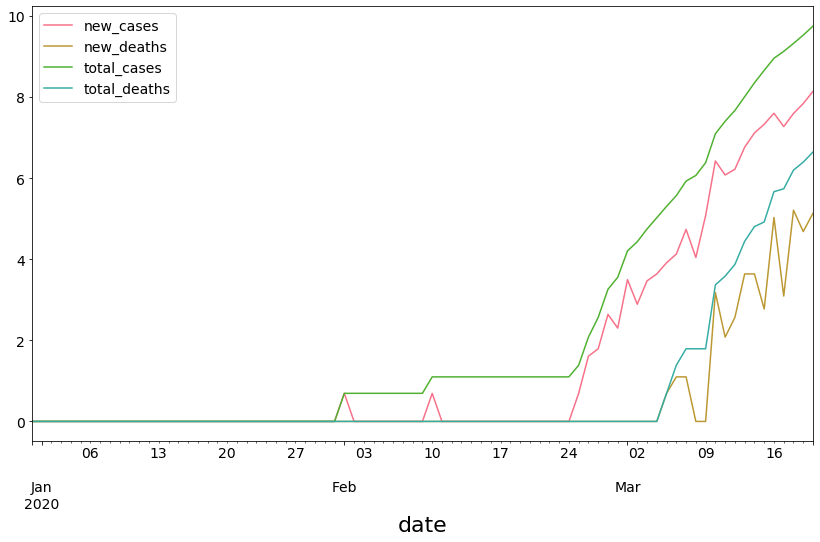

In [23]:
spain_data.plot(x='date')
#plt.xticks(rotation=-45)

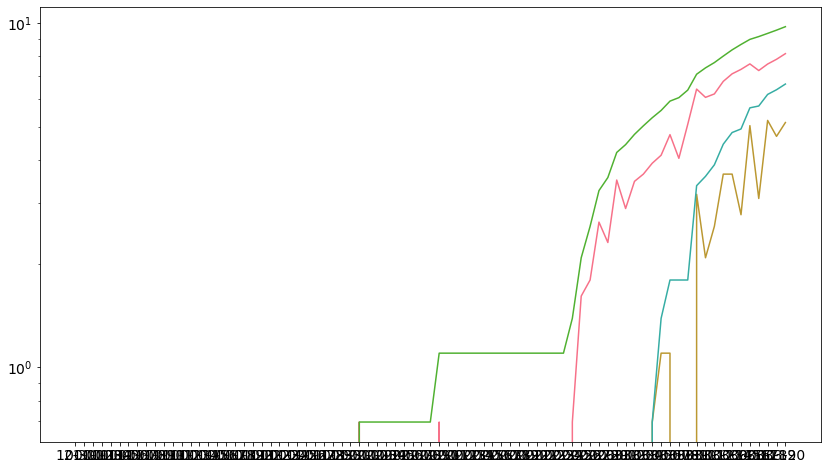

In [24]:
# an attempt to plot using the OO interface as suggested by: 
# https://dev.to/skotaro/artist-in-matplotlib---something-i-wanted-to-know-before-spending-tremendous-hours-on-googling-how-tos--31oo

fig = plt.figure()
log_ax = fig.add_subplot(1, 1, 1,label='log')
#reg_ax = fig.add_subplot(2, 1, 2, label='reg')
log_ax.plot(spain_data['easy_date'], spain_data.iloc[:, 2:6])
#plt.xticks(rotation=-20)
log_ax.set_yscale('log')

(array([18261, 18262, 18293, 18322, 18341], dtype=int64),
 <a list of 5 Text xticklabel objects>)

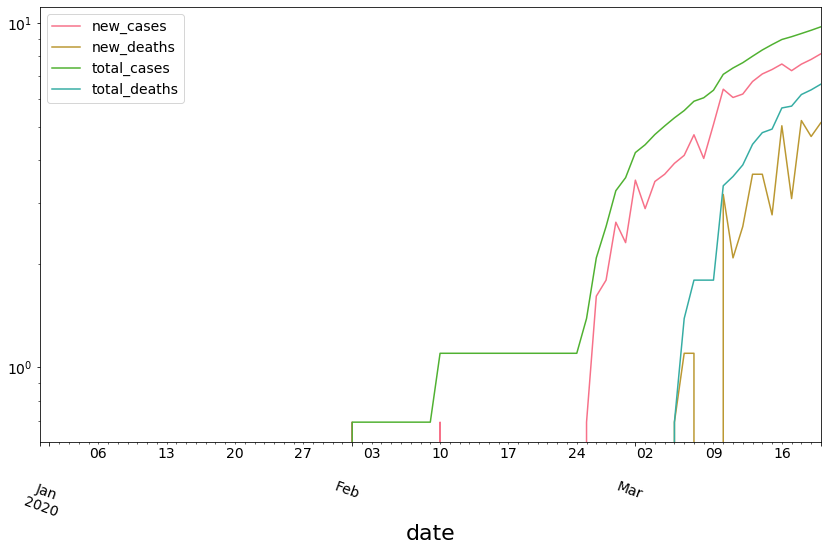

<Figure size 1008x576 with 0 Axes>

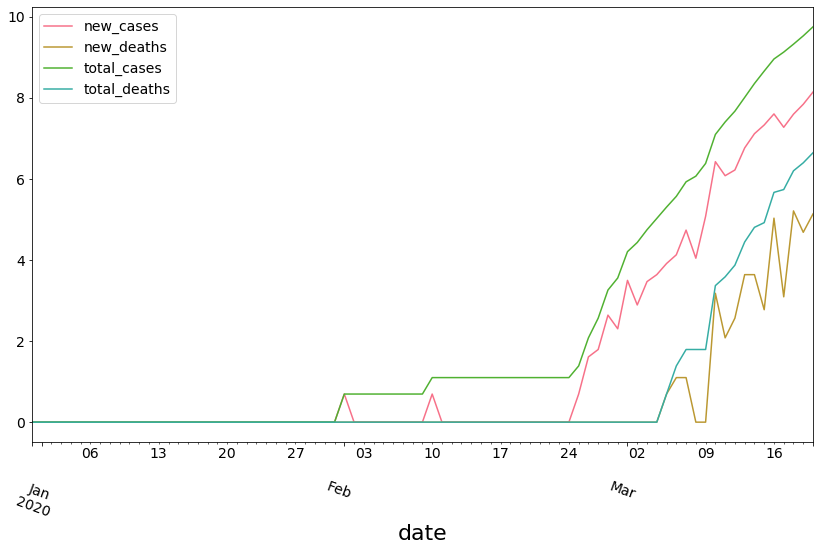

In [25]:
spain_data.plot(x='date')
plt.xticks(rotation=-20)
plt.yscale('log')
plt.figure()
spain_data.plot(x='date')
plt.xticks(rotation=-20)

In [26]:
heavily_affected_countries = sorted_most_recent_data_by_country[sorted_most_recent_data_by_country['total_cases'] > np.log(1000)]
heavily_affected_countries = heavily_affected_countries.reset_index()
heavily_affected_countries

,location,date,new_cases,new_deaths,total_cases,total_deaths,easy_date
0,China,2020-03-20,4.605170,1.609438,11.306369,8.087948,03-20
1,Italy,2020-03-20,8.579792,6.063785,10.622205,8.133881,03-20
2,Iran,2020-03-20,6.953684,5.010635,9.820541,7.158514,03-20
3,Spain,2020-03-20,8.140898,5.135798,9.749637,6.643790,03-20
4,United States,2020-03-20,8.483843,0.000000,9.564582,5.017280,03-20
5,Germany,2020-03-20,8.689633,3.433987,9.556692,3.784190,03-20
6,France,2020-03-20,7.529406,4.859812,9.305287,5.921578,03-20
7,South Korea,2020-03-20,4.477337,2.302585,9.065661,4.615121,03-20
8,Switzerland,2020-03-20,6.778785,2.564949,8.265907,3.526361,03-20
9,United Kingdom,2020-03-20,6.473891,3.737670,8.094989,4.976734,03-20


In [27]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual, interactive

In [28]:
all_countries = "All Heavily Affected Countries"
country_choice_widget = widgets.Dropdown(options=[*heavily_affected_countries.loc[:, 'location'], all_countries], 
                                        description="Country", 
                                        value='China')
data_choice_widget = widgets.Dropdown(options=[*heavily_affected_countries.columns[2:6], "all data"],
                                     description="Data Type", 
                                     value='total_cases')

#heavily_affected_countries.loc[:, 'location']
def plot_data_by_country(data, country):
    if country != all_countries and data != "all data":
        country_dataframe = filled_data[filled_data['location'] == country]
        country_data = country_dataframe[["easy_date", data]]
        country_data.plot(x='easy_date')
        plt.xticks(rotation=-20)
        plt.locator_params(axis='x', tight=True, nbins=10)
    elif country != all_countries: # and data == "all data"
        country_dataframe = filled_data[filled_data['location'] == country]
        country_data = country_dataframe.drop(["date", "location"], axis='columns')
        #pd.DataFrame().drop()
        country_data.plot(x='easy_date')
        plt.xticks(rotation=-20)
        plt.locator_params(axis='x', tight=True, nbins=10)
    else: #country == "Show All"
        fig, ax = plt.subplots()
        #error is the starting value, each country's data starts
        # at a different date but is displayed as if it's all from jan 25th
        for country in heavily_affected_countries.loc[:, 'location']:
            country_dataframe = filled_data[filled_data['location'] == country]
            country_data = country_dataframe[["easy_date", data]]
            ax.plot(country_data['easy_date'], country_data[data], label=country)
        plt.legend(heavily_affected_countries.loc[:, 'location'])
        #locs, labels = plt.xticks()
        #every_other = lambda arr: [el for i, el in enumerate(arr) if i % 2 == 0] 
        #plt.xticks(every_other(locs), every_other(labels), rotation=-20)
        plt.xticks(rotation=-40)
        plt.locator_params(axis='x', tight=True, numticks=10)
        #print(labels[:5], every_other(labels)[:5])
    clean_for_title = lambda data: data[0].upper() + data[1:].replace('_c', ' C').replace('_d', ' D')
    plt.title(f"Number of {clean_for_title(data)} from Coronavirus in {country} Over Time")
    plt.xlabel("Date")
    plt.ylabel(f"Number of\n{clean_for_title(data)}", rotation=0, labelpad=80)
        

# Updates the image options based on directory value
def update_data_options(*args):
    if args[0]['new'] == all_countries:
        data_choice_widget.options = heavily_affected_countries.columns[2:6]
    else:
        data_choice_widget.options = [*heavily_affected_countries.columns[2:6], "all data"]
        #data_choice_widget.value = 'all data'
        
def update_country_options(*args):
    if args[0]['new'] == 'all data':
        if country_choice_widget.value == all_countries:
            data_choice_widget.value = data_choice_widget.options[0]
        else:
            country_choice_widget.options = heavily_affected_countries.loc[:, 'location']
            country_choice_widget.value = country_choice_widget.options[0]
    else:
        country_choice_widget.options = [*heavily_affected_countries.loc[:, 'location'], all_countries]
        
# Tie the data options to the country value
data_choice_widget.observe(update_data_options, 'value')
# Tie the country options to the data value
country_choice_widget.observe(update_country_options, 'value')
        
interact(plot_data_by_country, 
        data=data_choice_widget, 
        country=country_choice_widget)

interactive(children=(Dropdown(description='Data Type', index=2, options=('new_cases', 'new_deaths', 'total_ca…

<function __main__.plot_data_by_country(data, country)>

In [29]:
np.max(filled_data[filled_data['location'] == 'Iran']['date'])

Timestamp('2020-03-20 00:00:00')

In [30]:
emergency_declarations = pd.DataFrame(
    {'China': "",
     'Italy': "1-31-20",
     'Iran': "",
     'Spain': "3-14-20",
     'United States': "3-13-20",
     'France': "",
     'South Korea': "3-23-20",
     'Germany': "",
     'Switzerland': "3-19-20",
     'United Kingdom': "",
     'Netherlands': "",
     'Austria': "",
     'Belgium': "3-13-20",
     'Norway': "",
     'Sweden': "",
     'Denmark': ""}, index=["Emergency Declaration Date"]).T

emergency_declarations = emergency_declarations.reset_index()
emergency_declarations.columns = ["Country", *emergency_declarations.columns[1:]]
emergency_declarations['Emergency Declaration Date'] = pd.to_datetime(emergency_declarations["Emergency Declaration Date"]) 
emergency_declarations

,Country,Emergency Declaration Date
0,China,NaT
1,Italy,2020-01-31
2,Iran,NaT
3,Spain,2020-03-14
4,United States,2020-03-13
5,France,NaT
6,South Korea,2020-03-23
7,Germany,NaT
8,Switzerland,2020-03-19
9,United Kingdom,NaT


In [31]:
nationwide_lockdown = pd.DataFrame(
    {'China': "1-28-20",
     'Italy': "3-9-20",
     'Iran': "",
     'Spain': "3-14-20",
     'United States': "",
     'France': "3-17-20",
     'South Korea': "",
     'Germany': "",
     'Switzerland': "3-16-20",
     'United Kingdom': "",
     'Netherlands': "",
     'Austria': "3-16-20",
     'Belgium': "",
     'Norway': "3-12-20",
     'Sweden': "",
     'Denmark': ""}, index=["Lockdown Date"]).T

nationwide_lockdown = nationwide_lockdown.reset_index()
nationwide_lockdown.columns = ["Country", *nationwide_lockdown.columns[1:]]
nationwide_lockdown['Lockdown Date'] = pd.to_datetime(nationwide_lockdown["Lockdown Date"]) 
nationwide_lockdown

,Country,Lockdown Date
0,China,2020-01-28
1,Italy,2020-03-09
2,Iran,NaT
3,Spain,2020-03-14
4,United States,NaT
5,France,2020-03-17
6,South Korea,NaT
7,Germany,NaT
8,Switzerland,2020-03-16
9,United Kingdom,NaT


In [32]:
heavily_affected_countries_measures = nationwide_lockdown.merge(
    emergency_declarations, how='right', on='Country')
heavily_affected_countries_measures

,Country,Lockdown Date,Emergency Declaration Date
0,China,2020-01-28,NaT
1,Italy,2020-03-09,2020-01-31
2,Iran,NaT,NaT
3,Spain,2020-03-14,2020-03-14
4,United States,NaT,2020-03-13
5,France,2020-03-17,NaT
6,South Korea,NaT,2020-03-23
7,Germany,NaT,NaT
8,Switzerland,2020-03-16,2020-03-19
9,United Kingdom,NaT,NaT


In [33]:
augmented_data = filled_data.merge(
    right=heritage_data, left_on='location', right_on="Country", how='left').drop("Country", axis=1)
augmented_data

,date,location,new_cases,new_deaths,total_cases,total_deaths,easy_date,WFI Score,log GDP,log Population
0,2019-12-31,Afghanistan,0.000000,0.000000,0.000000,0.000000,12-31,54.7,4.285626,3.584074
1,2020-01-01,Afghanistan,0.000000,0.000000,0.000000,0.000000,01-01,54.7,4.285626,3.584074
2,2020-01-02,Afghanistan,0.000000,0.000000,0.000000,0.000000,01-02,54.7,4.285626,3.584074
3,2020-01-03,Afghanistan,0.000000,0.000000,0.000000,0.000000,01-03,54.7,4.285626,3.584074
4,2020-01-04,Afghanistan,0.000000,0.000000,0.000000,0.000000,01-04,54.7,4.285626,3.584074
...,...,...,...,...,...,...,...,...,...,...
5822,2020-03-18,World,9.599066,6.647688,12.180293,8.971321,03-18,NaN,NaN,NaN
5823,2020-03-19,World,9.817167,6.878326,12.270244,9.087495,03-19,NaN,NaN,NaN
5824,2020-03-20,World,10.282711,6.949856,12.398662,9.198875,03-20,NaN,NaN,NaN
5825,2020-03-19,Zambia,1.098612,0.000000,1.098612,0.000000,03-19,53.5,4.289528,2.877680


In [34]:
heavy_augmented_data = augmented_data[augmented_data['location'].isin(heavily_affected_countries.loc[:, 'location'])]
heavy_augmented_data_with_measures = heavy_augmented_data.merge(
    right=heavily_affected_countries_measures, how='left', left_on='location', right_on='Country').drop("Country", axis=1)
heavy_augmented_data_with_measures

,date,location,new_cases,new_deaths,total_cases,total_deaths,easy_date,WFI Score,log GDP,log Population,Lockdown Date,Emergency Declaration Date
0,2019-12-31,Austria,0.000000,0.000000,0.000000,0.000000,12-31,73.3,6.138202,2.184364,2020-03-16,NaT
1,2020-01-01,Austria,0.000000,0.000000,0.000000,0.000000,01-01,73.3,6.138202,2.184364,2020-03-16,NaT
2,2020-01-02,Austria,0.000000,0.000000,0.000000,0.000000,01-02,73.3,6.138202,2.184364,2020-03-16,NaT
3,2020-01-03,Austria,0.000000,0.000000,0.000000,0.000000,01-03,73.3,6.138202,2.184364,2020-03-16,NaT
4,2020-01-04,Austria,0.000000,0.000000,0.000000,0.000000,01-04,73.3,6.138202,2.184364,2020-03-16,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...
1291,2020-03-16,United States,6.714171,2.564949,8.236156,4.248495,03-16,76.6,9.927890,5.791036,NaT,2020-03-13
1292,2020-03-17,United States,6.788972,2.833213,8.447200,4.454347,03-17,76.6,9.927890,5.791036,NaT,2020-03-13
1293,2020-03-18,United States,7.477038,3.178054,8.768419,4.691348,03-18,76.6,9.927890,5.791036,NaT,2020-03-13
1294,2020-03-19,United States,8.002694,3.761200,9.150166,5.017280,03-19,76.6,9.927890,5.791036,NaT,2020-03-13


In [35]:
lockdowns = pd.to_numeric(heavy_augmented_data_with_measures["Lockdown Date"])
dates = pd.to_numeric(pd.to_datetime(heavy_augmented_data_with_measures["date"])) 
heavy_augmented_data_with_measures["Locked Down"] = ((lockdowns > 0) & (lockdowns <= dates)).astype(int)
heavy_augmented_data_with_measures["Since Lockdown"] = \
    (pd.to_timedelta(dates - lockdowns) + timedelta(days = 1)) * heavy_augmented_data_with_measures["Locked Down"]
heavy_augmented_data_with_measures["14 After Lockdown"] = \
    (heavy_augmented_data_with_measures['Since Lockdown'] > pd.to_timedelta("14 days")).astype(int)
heavy_augmented_data_with_measures['Since Lockdown'] = \
    heavy_augmented_data_with_measures['Since Lockdown'].apply(lambda a: a.value)
heavy_augmented_data_with_measures

,date,location,new_cases,new_deaths,total_cases,total_deaths,easy_date,WFI Score,log GDP,log Population,Lockdown Date,Emergency Declaration Date,Locked Down,Since Lockdown,14 After Lockdown
0,2019-12-31,Austria,0.000000,0.000000,0.000000,0.000000,12-31,73.3,6.138202,2.184364,2020-03-16,NaT,0,0,0
1,2020-01-01,Austria,0.000000,0.000000,0.000000,0.000000,01-01,73.3,6.138202,2.184364,2020-03-16,NaT,0,0,0
2,2020-01-02,Austria,0.000000,0.000000,0.000000,0.000000,01-02,73.3,6.138202,2.184364,2020-03-16,NaT,0,0,0
3,2020-01-03,Austria,0.000000,0.000000,0.000000,0.000000,01-03,73.3,6.138202,2.184364,2020-03-16,NaT,0,0,0
4,2020-01-04,Austria,0.000000,0.000000,0.000000,0.000000,01-04,73.3,6.138202,2.184364,2020-03-16,NaT,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,2020-03-16,United States,6.714171,2.564949,8.236156,4.248495,03-16,76.6,9.927890,5.791036,NaT,2020-03-13,0,0,0
1292,2020-03-17,United States,6.788972,2.833213,8.447200,4.454347,03-17,76.6,9.927890,5.791036,NaT,2020-03-13,0,0,0
1293,2020-03-18,United States,7.477038,3.178054,8.768419,4.691348,03-18,76.6,9.927890,5.791036,NaT,2020-03-13,0,0,0
1294,2020-03-19,United States,8.002694,3.761200,9.150166,5.017280,03-19,76.6,9.927890,5.791036,NaT,2020-03-13,0,0,0


In [36]:
emergencies = pd.to_numeric(heavy_augmented_data_with_measures["Emergency Declaration Date"])
dates = pd.to_numeric(pd.to_datetime(heavy_augmented_data_with_measures["date"]))
heavy_augmented_data_with_measures["Declared Emergency"] = ((emergencies > 0) & (emergencies <= dates)).astype(int)
heavy_augmented_data_with_measures["Since Emergency Decl."] = \
    (pd.to_timedelta(dates - emergencies) + timedelta(days = 1)) * heavy_augmented_data_with_measures["Declared Emergency"]
heavy_augmented_data_with_measures["14 After Emergency"] = \
    (heavy_augmented_data_with_measures['Since Emergency Decl.'] > pd.to_timedelta("14 days")).astype(int)
heavy_augmented_data_with_measures['Since Emergency Decl.'] = \
    heavy_augmented_data_with_measures['Since Emergency Decl.'].apply(lambda a: a.value)
heavy_augmented_data_with_measures.tail(20)

,date,location,new_cases,new_deaths,total_cases,total_deaths,easy_date,WFI Score,log GDP,log Population,Lockdown Date,Emergency Declaration Date,Locked Down,Since Lockdown,14 After Lockdown,Declared Emergency,Since Emergency Decl.,14 After Emergency
1276,2020-03-01,United States,1.386294,0.693147,4.248495,0.693147,03-01,76.6,9.92789,5.791036,NaT,2020-03-13,0,0,0,0,0,0
1277,2020-03-02,United States,3.044522,0.693147,4.499810,1.098612,03-02,76.6,9.92789,5.791036,NaT,2020-03-13,0,0,0,0,0,0
1278,2020-03-03,United States,2.708050,1.609438,4.644391,1.945910,03-03,76.6,9.92789,5.791036,NaT,2020-03-13,0,0,0,0,0,0
1279,2020-03-04,United States,3.135494,1.386294,4.836282,2.302585,03-04,76.6,9.92789,5.791036,NaT,2020-03-13,0,0,0,0,0,0
1280,2020-03-05,United States,3.555348,1.098612,5.075174,2.484907,03-05,76.6,9.92789,5.791036,NaT,2020-03-13,0,0,0,0,0,0
1281,2020-03-06,United States,4.317488,0.693147,5.455321,2.564949,03-06,76.6,9.92789,5.791036,NaT,2020-03-13,0,0,0,0,0,0
1282,2020-03-07,United States,4.663439,1.098612,5.826000,2.708050,03-07,76.6,9.92789,5.791036,NaT,2020-03-13,0,0,0,0,0,0
1283,2020-03-08,United States,4.564348,1.386294,6.073045,2.890372,03-08,76.6,9.92789,5.791036,NaT,2020-03-13,0,0,0,0,0,0
1284,2020-03-09,United States,4.804021,1.609438,6.318968,3.091042,03-09,76.6,9.92789,5.791036,NaT,2020-03-13,0,0,0,0,0,0
1285,2020-03-10,United States,5.303305,1.791759,6.626718,3.295837,03-10,76.6,9.92789,5.791036,NaT,2020-03-13,0,0,0,0,0,0


In [37]:
def design_matrix(full_data):
    """ To use this for testing, add a row for each country that has 0's for 
    the next day for all output values, and then the predictions will show up
    
    We need to adjust the data to match inputs and outputs. We have timeseries 
    data on a per-day basis, augmented with background information on the
    country. What we need, however, is a three-day historical basis on 
    cases and testing, whether a lockdown is enforced on the particular
    day, as well as whether a state of emergency has been declared
    in the nation. This all is in addition to the background 
    information on the country.
    
    We'll have to compile information from the past three days into a row, 
    and add the current day's lockdown and emergency states. Finally, we'll 
    augment the data with background information. Once all that is done, we 
    can add the output values, the current increase in cases and deaths.
    """
    assert type(full_data) == pd.DataFrame
    # prep the structure of the dataframe here - sorted by date and then country,
    # so that each country is in a group and then each group is sorted chronologically
    full_data = full_data.sort_values(by=["location", "date"], axis=0)
    
    # find the first day where each country has data
    has_data = full_data[full_data["total_cases"] > 0].reset_index(drop=True)
    start_dates = pd.to_datetime(has_data.groupby(by='location')['date'].agg(lambda a: np.min(a)))
    
    # find the fourth from start day, using the first days
    fourth_days = start_dates + timedelta(days=3)
    
    # rename columns for current day to target
    def rename_func(col):
        if "new_" in col or "total_" in col:
            return col + "_target"
        return col
    #full_data = full_data.rename(rename_func, axis=1)

    # complete one-time calculations
    countries = np.unique(full_data['location'])
    max_date = pd.to_datetime(has_data.loc[:, "date"]).iloc[-1] - timedelta(days=3)
    country_grouped = full_data.groupby("location")
    data_names = ["new_cases", "new_deaths"]
    for i in np.arange(1, 3 + 1):
        for dataname in data_names:
            full_data[str(dataname)+ "_" + str(i) + "_days_ago"] = 0.0
#     display(countries)
#     display(max_date)
#     display(data_values)
#     display(country_grouped)
    
    # do the grunt work
    country_dfs = dict.fromkeys(countries)
    for country in countries:
        country_data = country_grouped.get_group(country)
        max_index = np.max(country_data.index)
        curr_index = np.min(country_data.index)
        while curr_index - max_index < 0:
            data_values = country_data.loc[curr_index, country_data.columns[[2, 3, 4]]]
            for i in np.arange(1, 3 + 1):
                index_to_add_to = curr_index + i
                for dataname in data_names:
                    country_data[str(dataname)+ "_" + str(i) + "_days_ago"][index_to_add_to] = data_values.loc[dataname]
            curr_index += 1
        country_dfs[country] = country_data
    
    full_data = pd.concat(country_dfs.values())
    return full_data
    
result = design_matrix(heavy_augmented_data_with_measures)
result

C:\Users\aurum\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\aurum\Anaconda3\lib\site-packages\ipykernel_launcher.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\aurum\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,date,location,new_cases,new_deaths,total_cases,total_deaths,easy_date,WFI Score,log GDP,log Population,...,14 After Lockdown,Declared Emergency,Since Emergency Decl.,14 After Emergency,new_cases_1_days_ago,new_deaths_1_days_ago,new_cases_2_days_ago,new_deaths_2_days_ago,new_cases_3_days_ago,new_deaths_3_days_ago
0,2019-12-31,Austria,0.000000,0.000000,0.000000,0.000000,12-31,73.3,6.138202,2.184364,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2020-01-01,Austria,0.000000,0.000000,0.000000,0.000000,01-01,73.3,6.138202,2.184364,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2020-01-02,Austria,0.000000,0.000000,0.000000,0.000000,01-02,73.3,6.138202,2.184364,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2020-01-03,Austria,0.000000,0.000000,0.000000,0.000000,01-03,73.3,6.138202,2.184364,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2020-01-04,Austria,0.000000,0.000000,0.000000,0.000000,01-04,73.3,6.138202,2.184364,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,2020-03-16,United States,6.714171,2.564949,8.236156,4.248495,03-16,76.6,9.927890,5.791036,...,0,1,345600000000000,0,6.656727,2.397895,6.238325,2.079442,5.863631,2.397895
1292,2020-03-17,United States,6.788972,2.833213,8.447200,4.454347,03-17,76.6,9.927890,5.791036,...,0,1,432000000000000,0,6.714171,2.564949,6.656727,2.397895,6.238325,2.079442
1293,2020-03-18,United States,7.477038,3.178054,8.768419,4.691348,03-18,76.6,9.927890,5.791036,...,0,1,518400000000000,0,6.788972,2.833213,6.714171,2.564949,6.656727,2.397895
1294,2020-03-19,United States,8.002694,3.761200,9.150166,5.017280,03-19,76.6,9.927890,5.791036,...,0,1,604800000000000,0,7.477038,3.178054,6.788972,2.833213,6.714171,2.564949


In [38]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [48]:
def get_X_y_from_data(result):
    X = result.loc[:, "WFI Score":].drop(["Lockdown Date", "Emergency Declaration Date"], axis=1)
    y = result.iloc[:, 2:4]
    return X, y

def rmse(pred=[], actual=[], sqerr=[]):
    if len(sqerr) == 0:
        return np.sqrt(np.sum(np.power(pred - actual, 2))/len(pred))
    return np.sqrt(np.sum(sqerr/len(sqerr)))

def find_both_rmses_from_df(df, as_df=True, rmse_suffix=""):
    cases_rmse = rmse(df['new_cases_pred'], df['new_cases_actual'])
    deaths_rmse = rmse(df['new_deaths_pred'], df['new_deaths_actual'])
    if as_df:
        return pd.DataFrame([cases_rmse, deaths_rmse], columns=["RMSE" + rmse_suffix], index=["Cases", "Deaths"])
    return cases_rmse, deaths_rmse
    
def get_predictions_v_actual_as_df(trained_model, X, y):
    predictions = pd.DataFrame(trained_model.predict(X), columns=["new_cases" ,"new_deaths"])
    predictions.rename(lambda name: str(name) + "_pred", inplace=True, axis=1)
    y.rename(lambda name: str(name) + "_actual", inplace=True, axis=1)
    pred_v_real = pd.concat([predictions, y], axis=1)
    pred_v_real_raw = pred_v_real.apply(lambda arr: np.power(np.e, arr))
    return pred_v_real_raw   

def prep_linear_model(train_X, train_y):
    lin_model = linear_model.LinearRegression()
    lin_model.fit(train_X, train_y)
    return lin_model
    
def evaluate_models():
    Train_X, test_X, train_y, test_y = train_test_split(*get_X_y_from_data(result), train_size=0.8, shuffle=True)
    lm = prep_linear_model(train_X, train_y)
    lm_rmses = find_both_rmses_from_df(
            get_predictions_v_actual_as_df(lm, test_X, test_y),
            rmse_suffix=" - MultiVar LinReg")
    
    rmses = pd.concat([lm_rmses])
    return rmses

evaluate_models()

,RMSE - MultiVar LinReg
Cases,328.217620
Deaths,7.682162


In [40]:
lm.fit(train_X, train_y)
predictions = pd.DataFrame(lm.predict(train_X), columns=["new_cases" ,"new_deaths"])
predictions.rename(lambda name: str(name) + "_pred", inplace=True, axis=1)
train_y.rename(lambda name: str(name) + "_actual", inplace=True, axis=1)

In [41]:
pred_v_real = pd.concat([predictions, train_y], axis=1)
pred_v_real_raw = pred_v_real.apply(lambda arr: np.power(np.e, arr))
pred_v_real_raw

,new_cases_pred,new_deaths_pred,new_cases_actual,new_deaths_actual
0,3.325538,0.968896,1.0,1.0
1,6.055669,1.089118,1.0,1.0
2,1.093431,0.985539,1.0,1.0
3,1.093431,0.985539,1.0,1.0
4,1.093431,0.985539,1.0,1.0
...,...,...,...,...
1291,NaN,NaN,824.0,13.0
1292,NaN,NaN,888.0,17.0
1293,NaN,NaN,1767.0,24.0
1294,NaN,NaN,2989.0,43.0


In [42]:
diffs = pred_v_real_raw.iloc[:, [0, 1]].values - pred_v_real_raw.iloc[:, [2, 3]].values
diffs = pd.DataFrame(diffs, columns=["new_cases" ,"new_deaths"])
diffs.rename(lambda name: str(name) + "_diffs", inplace=True, axis=1)
pred_v_real_diffs = pd.concat([pred_v_real_raw, diffs], axis=1)
pred_v_real_diffs

,new_cases_pred,new_deaths_pred,new_cases_actual,new_deaths_actual,new_cases_diffs,new_deaths_diffs
0,3.325538,0.968896,1.0,1.0,2.325538,-0.031104
1,6.055669,1.089118,1.0,1.0,5.055669,0.089118
2,1.093431,0.985539,1.0,1.0,0.093431,-0.014461
3,1.093431,0.985539,1.0,1.0,0.093431,-0.014461
4,1.093431,0.985539,1.0,1.0,0.093431,-0.014461
...,...,...,...,...,...,...
1291,NaN,NaN,824.0,13.0,NaN,NaN
1292,NaN,NaN,888.0,17.0,NaN,NaN
1293,NaN,NaN,1767.0,24.0,NaN,NaN
1294,NaN,NaN,2989.0,43.0,NaN,NaN


In [43]:
sqerr = np.power(diffs.values, 2)
sqerr = pd.DataFrame(sqerr, columns=["new_cases" ,"new_deaths"])
sqerr.rename(lambda name: str(name) + "_sqerr", inplace=True, axis=1)
pred_v_real_sqerr = pd.concat([pred_v_real_diffs, sqerr], axis=1)
pred_v_real_sqerr

,new_cases_pred,new_deaths_pred,new_cases_actual,new_deaths_actual,new_cases_diffs,new_deaths_diffs,new_cases_sqerr,new_deaths_sqerr
0,3.325538,0.968896,1.0,1.0,2.325538,-0.031104,5.408126,0.000967
1,6.055669,1.089118,1.0,1.0,5.055669,0.089118,25.559789,0.007942
2,1.093431,0.985539,1.0,1.0,0.093431,-0.014461,0.008729,0.000209
3,1.093431,0.985539,1.0,1.0,0.093431,-0.014461,0.008729,0.000209
4,1.093431,0.985539,1.0,1.0,0.093431,-0.014461,0.008729,0.000209
...,...,...,...,...,...,...,...,...
1291,NaN,NaN,824.0,13.0,NaN,NaN,NaN,NaN
1292,NaN,NaN,888.0,17.0,NaN,NaN,NaN,NaN
1293,NaN,NaN,1767.0,24.0,NaN,NaN,NaN,NaN
1294,NaN,NaN,2989.0,43.0,NaN,NaN,NaN,NaN


In [44]:
# article on Iranian stats: https://www.theatlantic.com/ideas/archive/2020/03/irans-coronavirus-problem-lot-worse-it-seems/607663/